In [52]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,8)
from matplotlib import rc
rc('text', usetex=True)
%config InlineBackend.figure_format ='retina'
# %matplotlib widget
import pandas as pd
from datetime import datetime as dt

In [53]:
SEED = 74
DATA_DIR = '../_data/eCommerce-cosmetics/'
DATA_OCT = DATA_DIR+'2019-Oct.csv'
DATA_NOV = DATA_DIR+'2019-Nov.csv' 

In [54]:
df = pd.concat([pd.read_csv(DATA_OCT, engine='c', sep=',')
                ,pd.read_csv(DATA_NOV, engine='c', sep=',')])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8738120 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 666.7+ MB


In [4]:
df["price"] = df["price"].astype("float32")

In [5]:
df["event_type"] = df["event_type"].astype("category")

In [6]:
df['event_time'] = pd.to_datetime(df['event_time'],infer_datetime_format=True)

In [7]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47,view,5867785,1487580007835370453,NaN,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


In [9]:
event_counts = df.event_type.value_counts()
event_counts

view                3938296
cart                2544192
remove_from_cart    1687591
purchase             568041
Name: event_type, dtype: int64

In [10]:
event_counts["purchase"]

568041

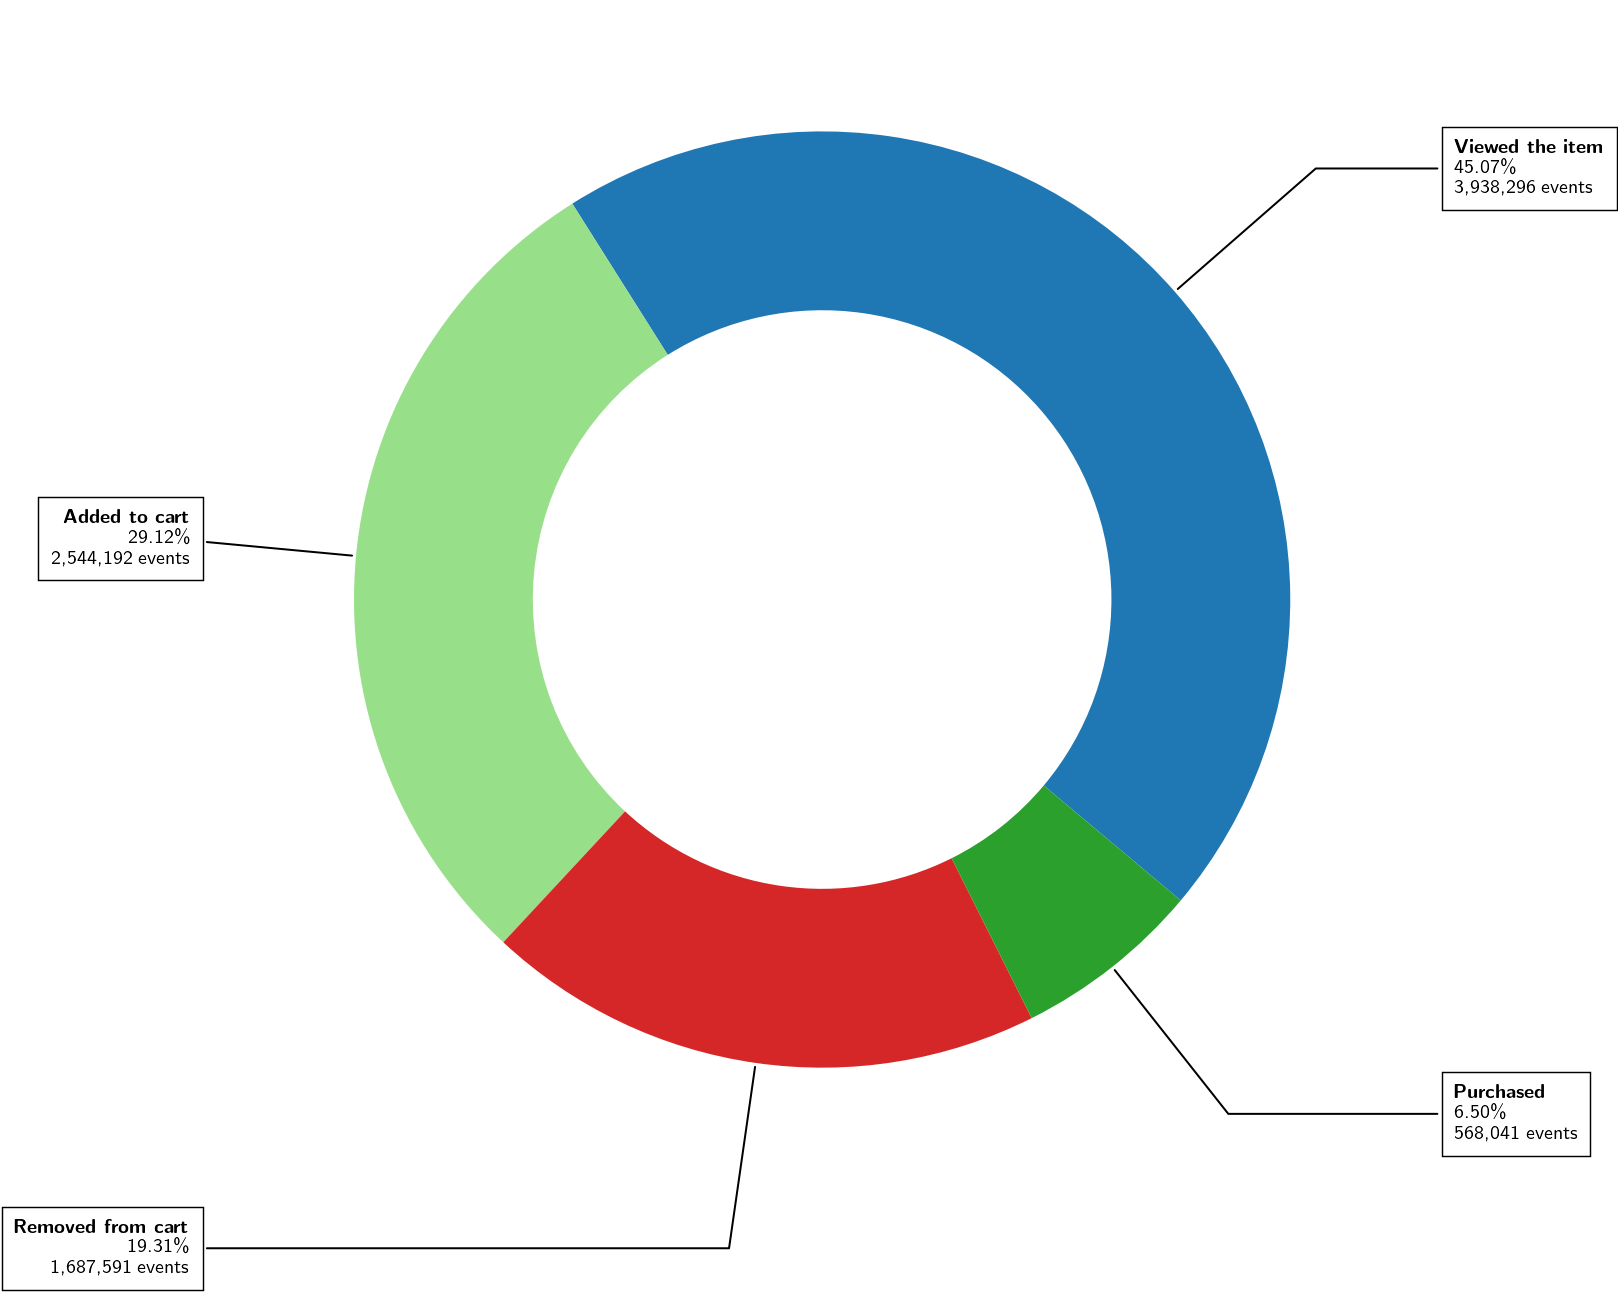

In [11]:
fig, ax = plt.subplots(figsize=(16, 9), subplot_kw=dict(aspect="equal"))
# W - width; P - precision; B - bold; N - normal
W = 2
P = 2
E = 'events'
event_counts = df.event_type.value_counts()
event_perc = df.event_type.value_counts(normalize=True) * 100
event_type_legend = [r"\textbf{Viewed the item}"+f"\n{event_perc['view']:{W}.{P}f}\%\n{event_counts['view']:,} {E}",
                     r"\textbf{Added to cart}"+f"\n{event_perc['cart']:{W}.{P}f}\%\n{event_counts['cart']:,} {E}",
                     r"\textbf{Removed from cart}"+f"\n{event_perc['remove_from_cart']:{W}.{P}f}\%\n{event_counts['remove_from_cart']:,} {E}",
                     r"\textbf{Purchased}"+f"\n{event_perc['purchase']:{W}.{P}f}\%\n{event_counts['purchase']:,} {E}"]

cmap = plt.get_cmap("tab20")
wedges, texts = ax.pie(event_counts, wedgeprops=dict(width=0.382), textprops=dict(color="w"), startangle=-40, colors=cmap([0,5,6,4]))

bbox_props = dict(boxstyle="square,pad=0.618", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(event_type_legend[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
fig.set_facecolor('w')
# ax.set_title("Logged user events")
plt.tight_layout()

fig.savefig('percentage-of-events.png',dpi=300)
fig.savefig('percentage-of-events.pdf')
plt.show()

*Note:* cart > (remove_from_cart + purchase), because some users simply leave the site with items in cart.

## Most viewed products

In [12]:
df_view = df[df.event_type == 'view']
print(f'Number of view events: {len(df_view)}')
df_view["product_id"].value_counts().describe()

Number of view events: 3938296


count    45508.00000
mean        86.54074
std        308.53416
min          1.00000
25%         10.00000
50%         27.00000
75%         71.00000
max      27287.00000
Name: product_id, dtype: float64

In [13]:
df_view["product_id"].value_counts().head(10)

5809910    27287
5892179    12400
5886282    12326
5877454    11558
5809912    11316
5751383     9960
5877456     9571
5751422     9300
5900651     9140
5856186     9055
Name: product_id, dtype: int64

## Most purchased products

In [14]:
df_purchase = df[df.event_type == 'purchase']
print(f'Number of purchase events: {len(df_purchase)}')
df_purchase["product_id"].value_counts().describe()

Number of purchase events: 568041


count    33172.000000
mean        17.124111
std         49.562639
min          1.000000
25%          2.000000
50%          6.000000
75%         14.000000
max       2449.000000
Name: product_id, dtype: float64

## Categories

In [15]:
category_dict=df[['category_id','product_id']].drop_duplicates()
number_of_products_in_cat = category_dict['category_id'].value_counts()
number_of_products_in_cat

1487580007675986893    2322
1487580013841613016    1820
1487580005595612013    1229
1487580008246412266     967
1487580005671109489     963
                       ... 
1487580010024796212       1
1487580011383750769       1
1487580011224367209       1
1487580008128971748       1
2069171133327868014       1
Name: category_id, Length: 500, dtype: int64

In [16]:
number_of_products_in_cat.describe()

count     500.00000
mean       91.92000
std       194.64961
min         1.00000
25%         8.00000
50%        29.00000
75%        89.50000
max      2322.00000
Name: category_id, dtype: float64

In [17]:
one_item_category = number_of_products_in_cat == 1
sum(one_item_category)

33

In [18]:
sum(number_of_products_in_cat < 8) - sum(one_item_category)

87

In [19]:
sum(number_of_products_in_cat < 4) - sum(one_item_category)

34

*Note (october):* There are 490 unique categories, but 28 of them has only 1 item. 96 categories have more than 1, but less than 8 items. 39 categories have 2 or 3 items in them.

*Note (november):* There are 491 unique categories, but 32 of them has only 1 item. 94 categories have more than 1, but less than 8 items. 33 categories have 2 or 3 items in them.

In [20]:
viewed_categories = df[df.event_type == 'view'].loc[:,['category_id']]
viewes_per_category = viewed_categories.category_id.value_counts()
viewes_per_category 

1487580007675986893    195061
1487580005092295511    160785
1487580005595612013    125707
1602943681873052386    122978
1487580006300255120    107729
                        ...  
1487580010897211483         1
1487580009890578479         1
1487580012231000209         1
1487580011140481125         1
1487580009857024046         1
Name: category_id, Length: 500, dtype: int64

*Note:* We need to make sure, that the number of categories is not higher in *number_of_products_in_cat* than in *views_per_category*. For example, if we view only the data from october  2019 this would be the case.

In [21]:
if len(number_of_products_in_cat) > len(viewes_per_category):
    for i in number_of_products_in_cat.index:
        if i not in viewes_per_category:
            print(f"Category_id not viewed: {i}. First event: {df[df['category_id']==i]['event_type'].iloc[0]}")
            viewes_per_category = viewes_per_category.append(pd.Series([0], index=[i]))
len(viewes_per_category)

500

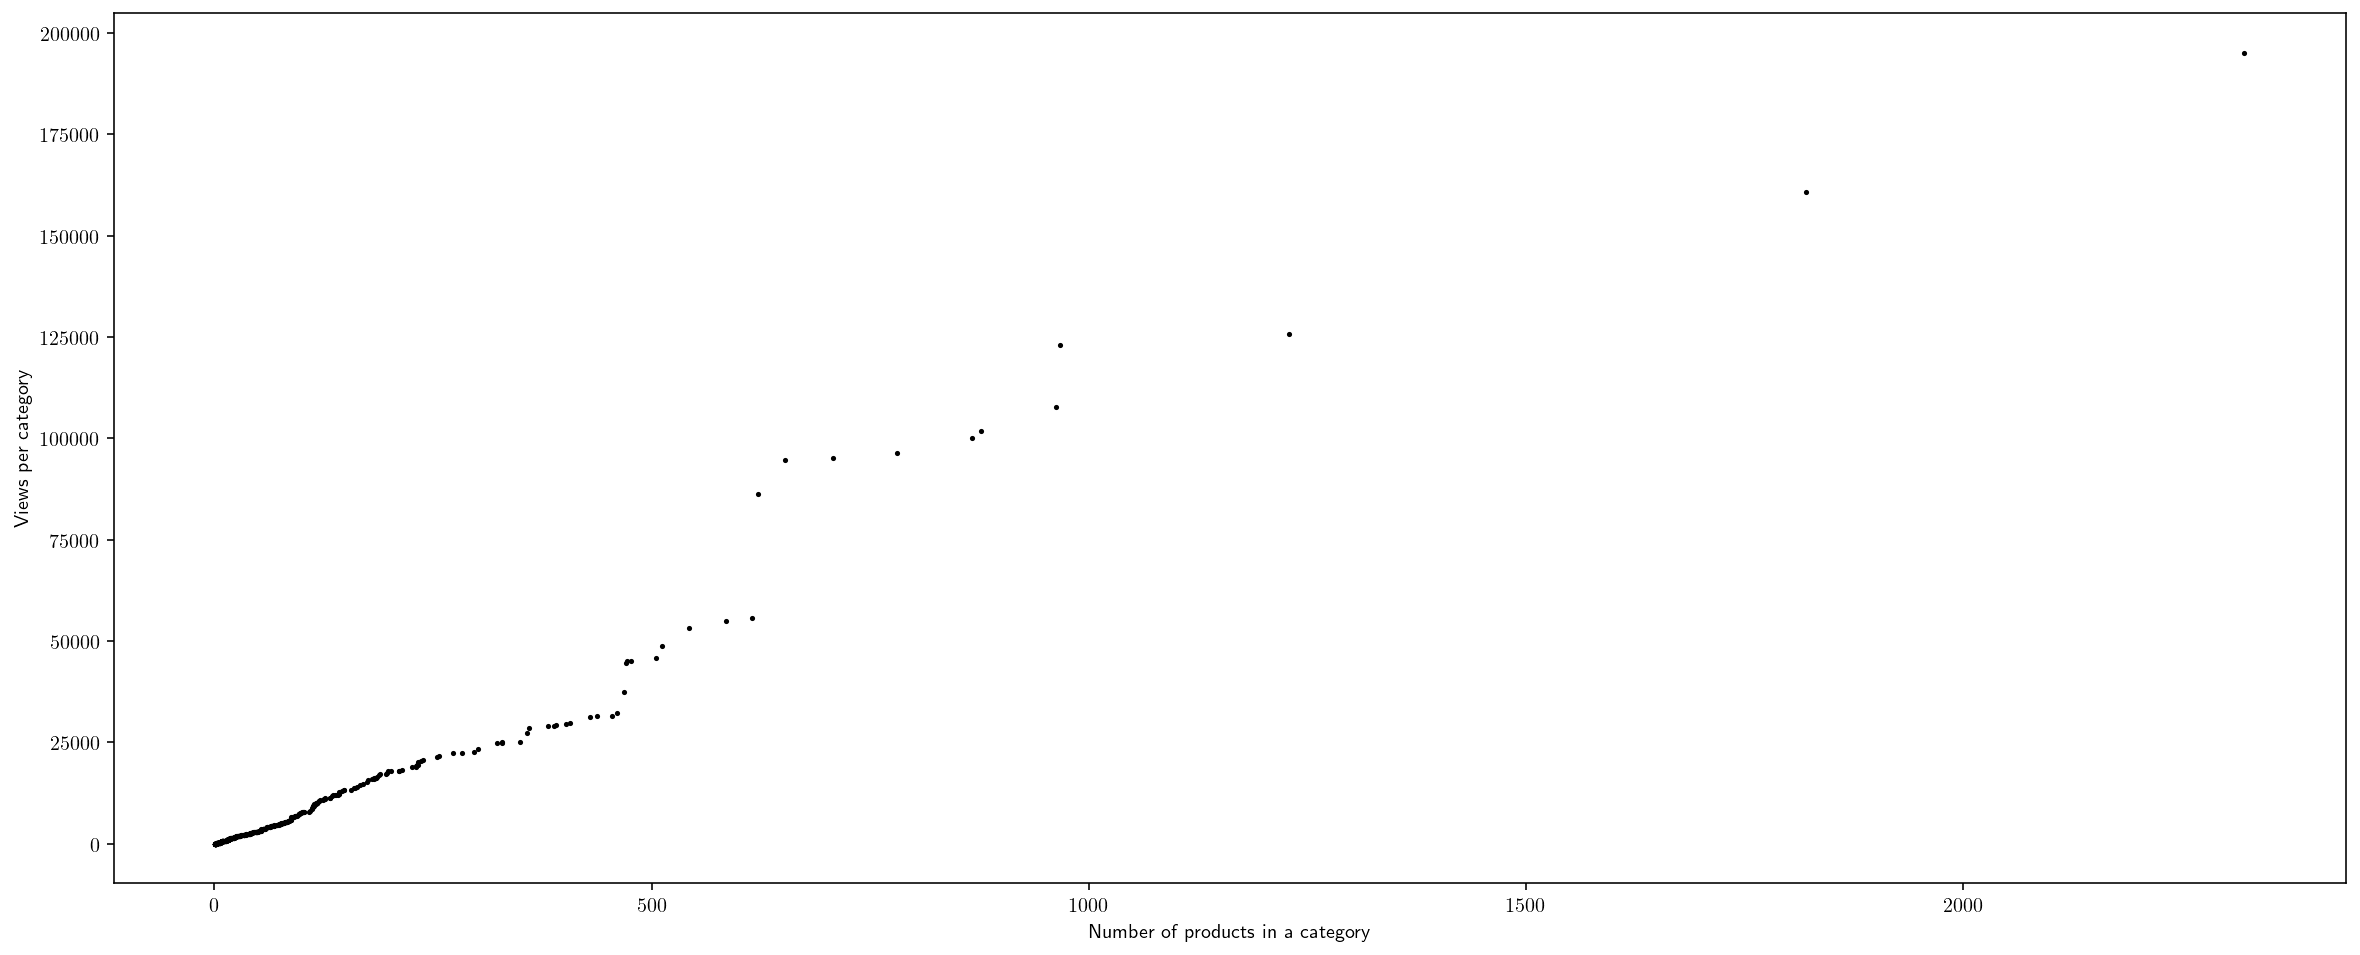

In [22]:
plt.scatter(number_of_products_in_cat, viewes_per_category, marker='.',color='k',s=10)
# plt.title('Views on a category, compared to the number of products in it.')
plt.xlabel('Number of products in a category')
plt.ylabel('Views per category')
plt.savefig(fname='views-num-products.png',dpi=300)
plt.savefig(fname='views-num-products.pdf')
plt.show()

In [23]:
print(f"There is a strong positive correlation between the number of products in a category and the number of views the category gets.")
print(f"The Pearson product-moment correlation coefficient is R={np.corrcoef(number_of_products_in_cat, viewes_per_category)[0,1]:.4f}.")

There is a strong positive correlation between the number of products in a category and the number of views the category gets.
The Pearson product-moment correlation coefficient is R=0.9798.


In [24]:
users = df['user_id'].value_counts()

In [25]:
users.describe()

count    713100.000000
mean         12.253709
std          54.649878
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max       11786.000000
Name: user_id, dtype: float64

In [26]:
users_events_crosstab=pd.crosstab(df['user_id'],df['event_type'])
print(users_events_crosstab.sort_values(by='view',ascending=False).head())

event_type  cart  purchase  remove_from_cart  view
user_id                                           
527021202   1682         0               702  9402
550388516      5         0                12  7251
557616099     92         6                59  3824
557956487    130        17                85  2745
352394658    116        48                85  2605


### The events of the most active user

In [27]:
users_events_crosstab.loc[users.index[0]]

event_type
cart                1682
purchase               0
remove_from_cart     702
view                9402
Name: 527021202, dtype: int64

### The events of the 2nd most active user

In [28]:
users_events_crosstab.loc[users.index[1]]

event_type
cart                   5
purchase               0
remove_from_cart      12
view                7251
Name: 550388516, dtype: int64

### The events of the 3rd most active user

In [29]:
users_events_crosstab.loc[users.index[2]]

event_type
cart                1440
purchase              58
remove_from_cart    2659
view                 318
Name: 552908674, dtype: int64

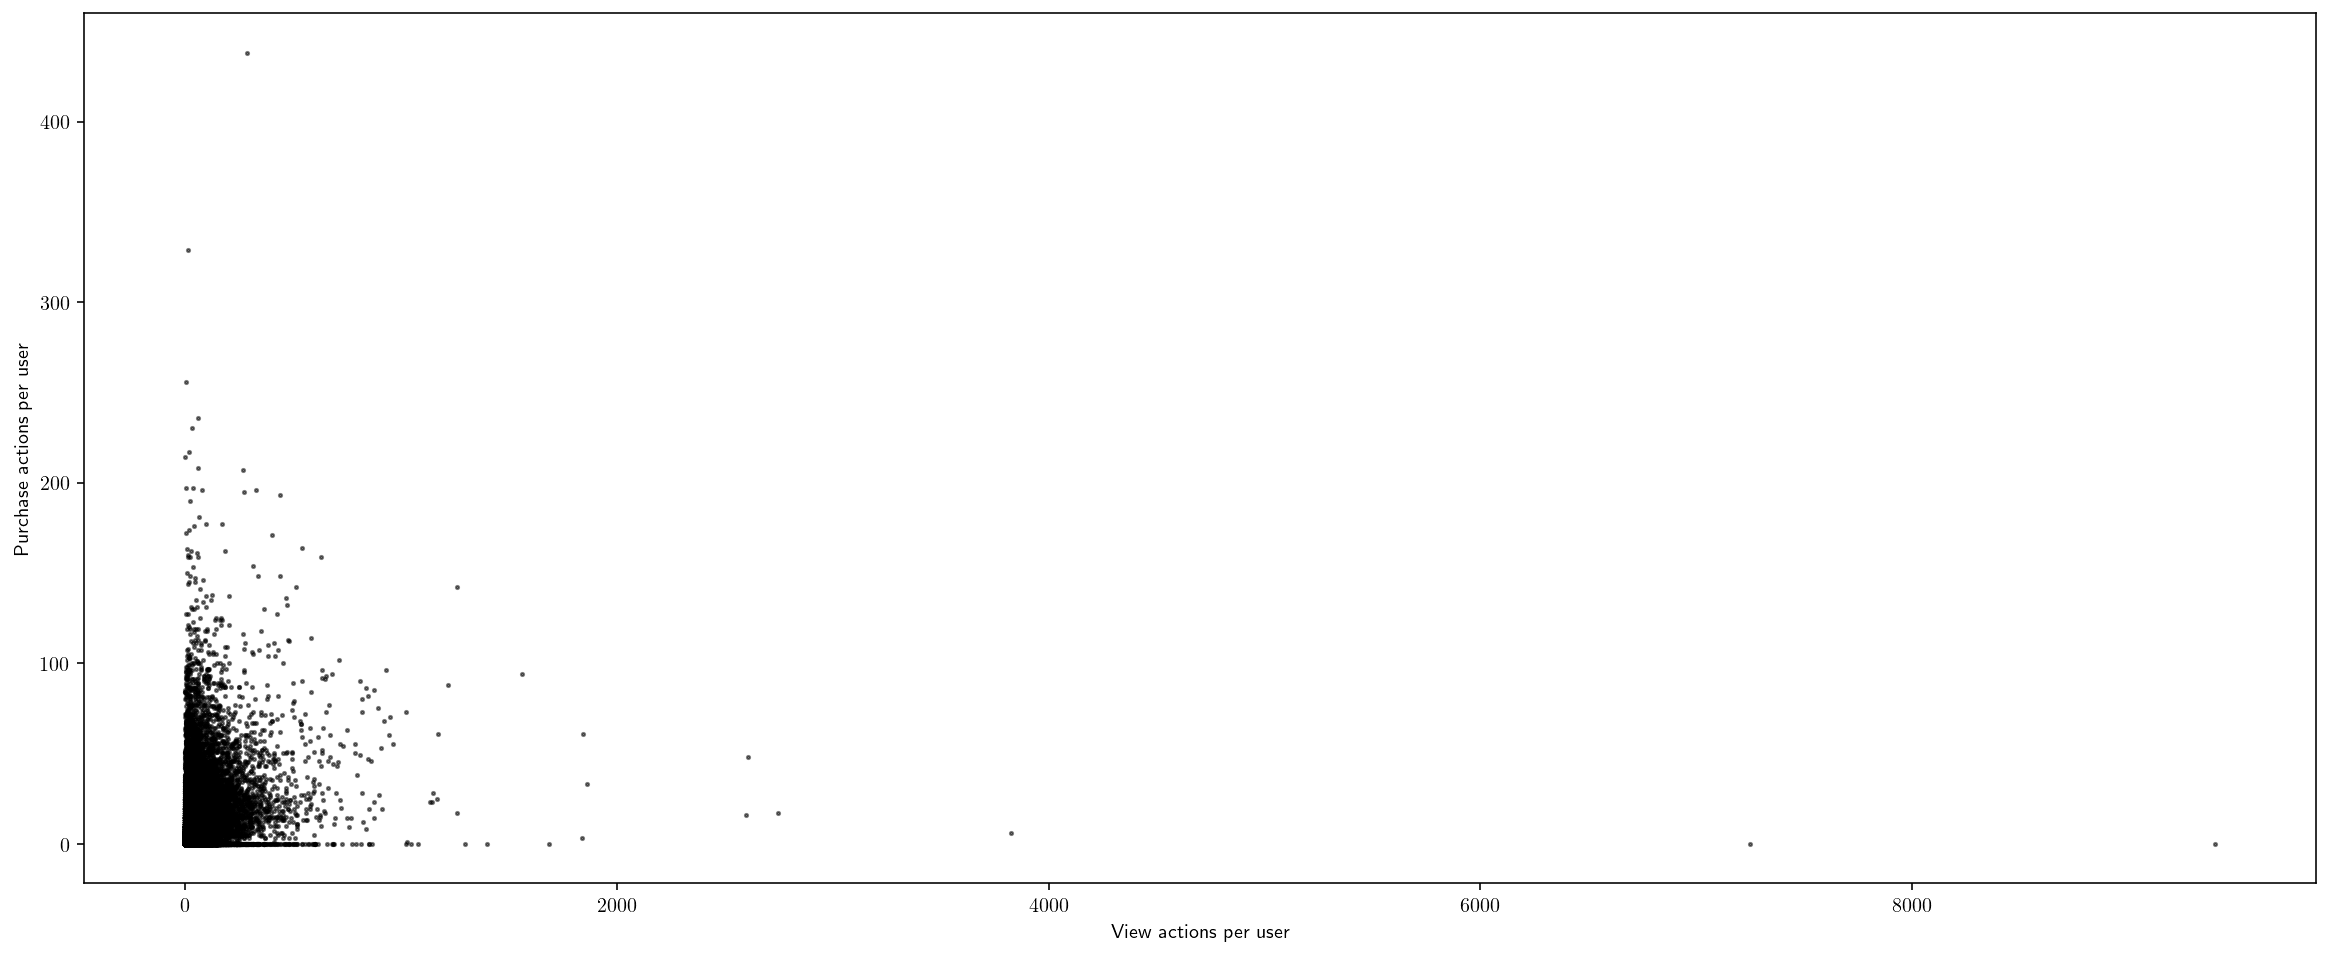

In [30]:
plt.scatter(users_events_crosstab['view'], users_events_crosstab['purchase'], marker='.',color='k',alpha=0.5,s=10)
# plt.title('Number of views and number of purchase actions per user.')
plt.xlabel('View actions per user')
plt.ylabel('Purchase actions per user')
plt.show()
# fig.savefig('view-purchase-per-user.png',dpi=300)
# fig.savefig('view-purchase-per-user.pdf')

In [31]:
print(f"The Pearson product-moment correlation coefficient is R={np.corrcoef(users_events_crosstab['view'], users_events_crosstab['purchase'])[0,1]:.4f}.")

The Pearson product-moment correlation coefficient is R=0.3493.


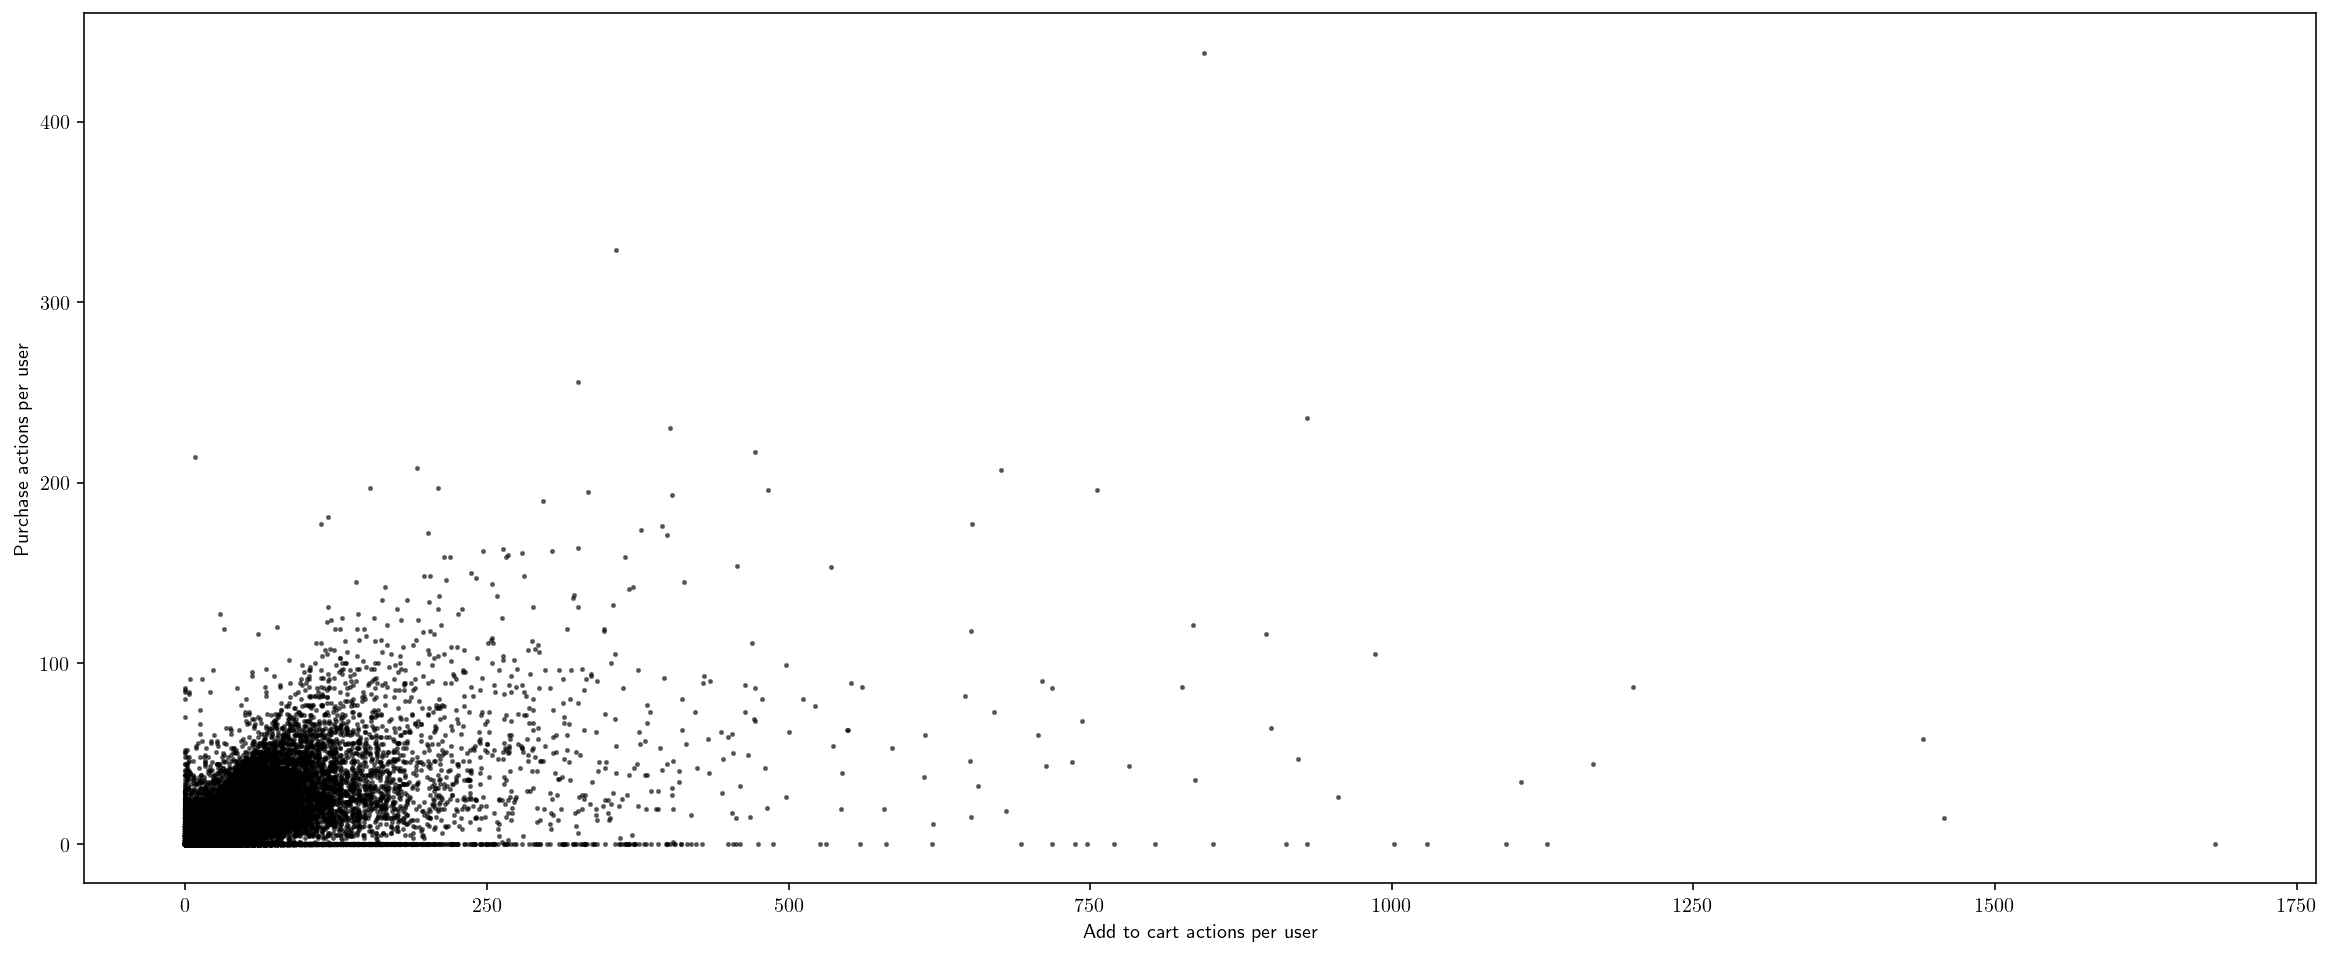

In [32]:
plt.scatter(users_events_crosstab['cart'], users_events_crosstab['purchase'], marker='.',color='k',alpha=0.5,s=10)
# plt.title('Number of add to cart actions and number of purchase actions per user.')
plt.xlabel('Add to cart actions per user')
plt.ylabel('Purchase actions per user')
plt.show()

In [33]:
print(f"The Pearson product-moment correlation coefficient is R={np.corrcoef(users_events_crosstab['cart'], users_events_crosstab['purchase'])[0,1]:.4f}.")

The Pearson product-moment correlation coefficient is R=0.6249.


## A single user's journey during a session

In [34]:
sample = df.user_session.sample(n=1,random_state=SEED).item()
df.loc[df.user_session == sample].sort_values(by='event_time')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1802074,2019-10-13 19:10:27,cart,5859406,1487580005671109489,NaN,masura,2.37,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1802221,2019-10-13 19:11:18,cart,5727536,1487580004882580302,NaN,NaN,2.70,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1802307,2019-10-13 19:11:44,cart,5560994,1487580005595612013,NaN,NaN,3.00,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1802354,2019-10-13 19:12:07,view,5835755,1487580005268456287,NaN,NaN,6.35,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1802433,2019-10-13 19:12:44,cart,5859412,1487580005671109489,NaN,masura,2.37,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
...,...,...,...,...,...,...,...,...,...
1805833,2019-10-13 19:32:18,remove_from_cart,5560994,1487580005595612013,NaN,NaN,3.00,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1805832,2019-10-13 19:32:18,remove_from_cart,5560994,1487580005595612013,NaN,NaN,3.00,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1805837,2019-10-13 19:32:19,remove_from_cart,5727536,1487580004882580302,NaN,NaN,2.70,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e
1805842,2019-10-13 19:32:21,remove_from_cart,5859406,1487580005671109489,NaN,masura,2.37,543406757,d3837fcf-958c-4bf4-8c61-e5d4a211739e


## Traffic fluctuation during the observed daterange

In [35]:
fluct = df.loc[:,['event_time','user_id']]
fluct['day'] = fluct['event_time'].apply(lambda s: str(s)[0:10])

In [36]:
daily_visitors = fluct.drop_duplicates().groupby(['day'])['user_id'].agg(['count']).sort_values(by=['day'], ascending=True)
daily_visitors.head()

,count
day,
2019-10-01,126245
2019-10-02,181132
2019-10-03,109820
2019-10-04,102356
2019-10-05,94707


In [37]:
X = pd.Series(daily_visitors.index.values).apply(lambda s: dt.strptime(s, '%Y-%m-%d').date())

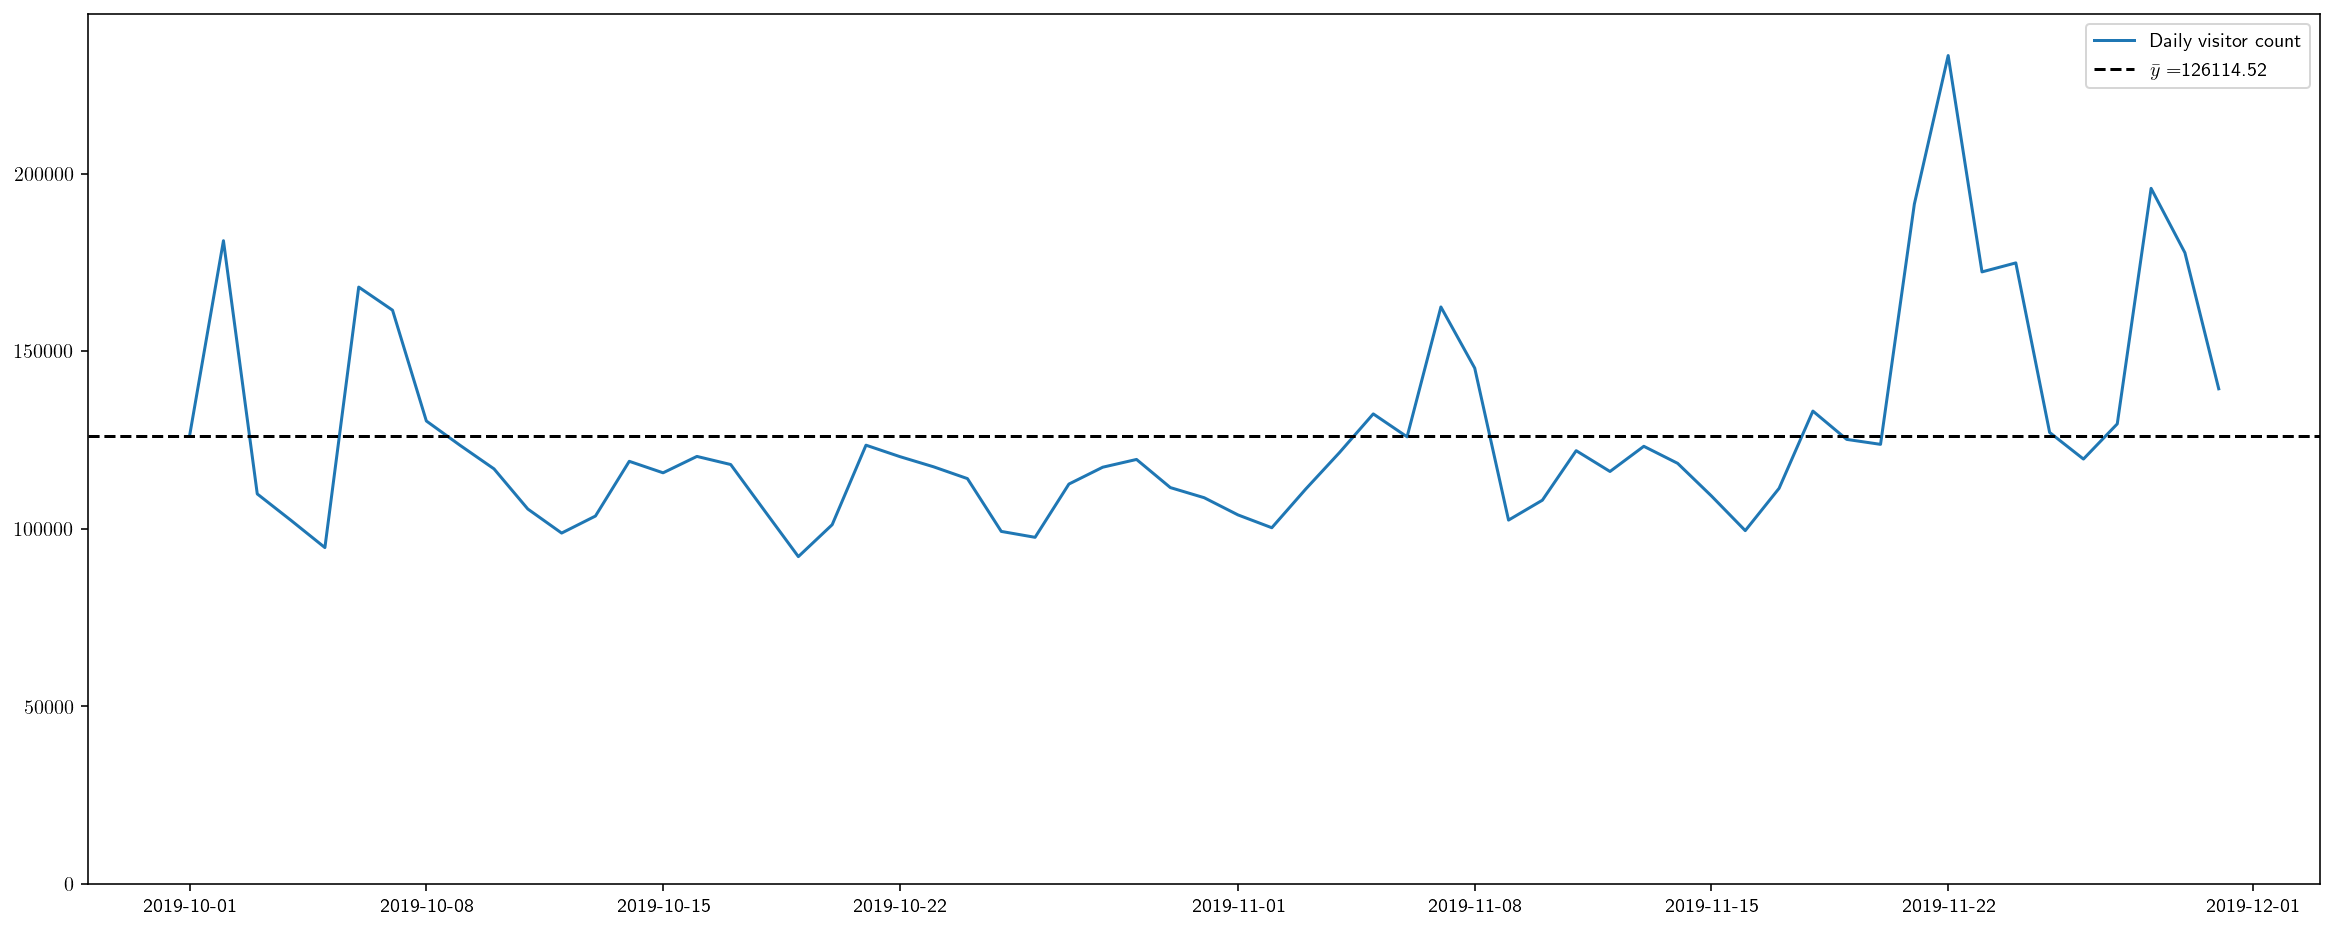

In [38]:
plt.plot(X,daily_visitors['count'])
plt.ylim((0,daily_visitors['count'].max()*1.05))
plt.axhline(y = daily_visitors.mean()[0],linestyle='--', color='black')
plt.legend(['Daily visitor count', r"$\bar{y}=$"+f"{daily_visitors.mean()[0]:.2f}"])
plt.show()

## Visitors

In [39]:
print(f'Total number of visitors in the observed data-range: {daily_visitors.sum().item():,}')

Total number of visitors in the observed data-range: 7,692,986


In [40]:
print(f'Total number of unique visitors in the observed data-range: {len(df.user_id.unique()):,}')

Total number of unique visitors in the observed data-range: 713,100


In [41]:
visitors = df.user_id.value_counts()
visitors

527021202    11786
550388516     7268
552908674     4475
510369366     4069
500179293     4037
             ...  
555175408        1
558491173        1
529104438        1
478895730        1
565205492        1
Name: user_id, Length: 713100, dtype: int64

In [42]:
visitors.describe()

count    713100.000000
mean         12.253709
std          54.649878
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max       11786.000000
Name: user_id, dtype: float64

In [51]:
print(f"Number of events with missing user_id: {len(df[df.user_id.isnull()])}")

Number of events with missing user_id: 0
